# Salted X Y Graph

In [1]:
%matplotlib inline

import numpy as np

import math as math

from matplotlib import pyplot as plt

In [2]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

C:\Users\hosan\AppData\Local\Continuum\anaconda3\envs\Tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
### To solve memory leak issues.

from keras.backend.tensorflow_backend import set_session
from keras.backend.tensorflow_backend import clear_session
from keras.backend.tensorflow_backend import get_session
import tensorflow

# Reset Keras Session
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()

    try:
        del classifier # this is from global space - change this as you need
    except:
        pass

    #print(gc.collect()) # if it's done something you should see a number being outputted

    # use the same config as you used to create the session
    config = tensorflow.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tensorflow.Session(config=config))

### The Validation Set

In [4]:
np.random.seed(13122018)
sample_indexes = np.random.choice(range(len(X_train)), 48000, replace=False)

In [5]:
select = np.in1d(range(X_train.shape[0]), sample_indexes)

In [6]:
X_valid = X_train[~select]
Y_valid = Y_train[~select]
X_train = X_train[select]
Y_train = Y_train[select]

Saving the Original data.

In [7]:
trainYs = Y_train
validYs = Y_valid
testYs = Y_test

#### Binaryzing the data

In [8]:
X_train = X_train >= 0.5
X_test = X_test >= 0.5
X_valid = X_valid >= 0.5

X_train = X_train.astype('int')
X_test = X_test.astype('int')

## Salting the Data 

In [9]:
## Randomly permutes 'shifts' number of bits of on
## a tensor.
def salt (tensor, shifts=10) :
    shp = tensor.shape # Shape of the tensor
    flatt = tensor.flatten()
    bits = flatt.shape[0]
    indx = np.random.permutation(bits)[:shifts]
    
    for i in indx :
        if flatt[i] == 0 :
            flatt[i] = 1
        else : 
            flatt[i] = 0

    
    flatt = flatt.reshape(shp)
    
    return flatt

In [10]:
## Randomly 'salts' a percentage of the tensor.
def saltP(tensor, percnt = 0.10) :
    bits = int(tensor.size*percnt)
    return salt(tensor, bits)

In [11]:
# Returns the index of the samples to be salted by a predetermined ammount.

def indxSalt(sts=X_train, pert=0.40) :
    nSalted = int(sts.shape[0]*pert)
    return np.random.permutation(sts.shape[0])[:nSalted]

In [12]:
# Salts the given set.
def saltSet(sts, pert=0.40, pxls=0.30) :
    nSet = np.copy(sts)
    indxs = indxSalt(sts, pert)
    for i in indxs :
        nSet[i] = saltP(nSet[i], percnt = pxls)
    return nSet

Let's see if this works.

In [13]:
minIndx = np.random.choice(len(X_train), 10, replace=False)

In [14]:
minSet = X_train[minIndx]

In [15]:
# nSamples, #corruption
foo = saltSet(minSet, 1, 0.5)

In [16]:
len(foo)

10

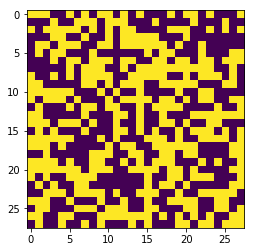

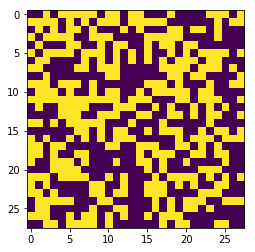

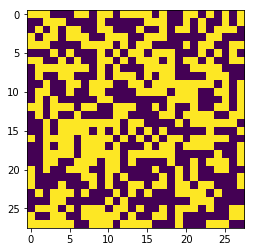

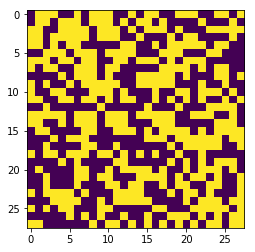

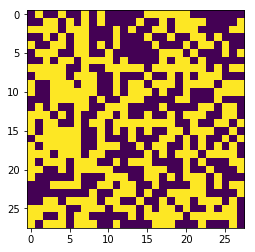

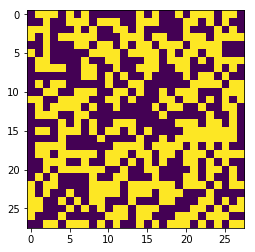

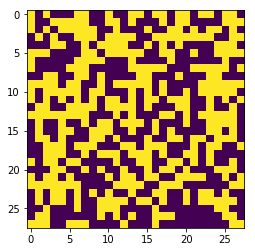

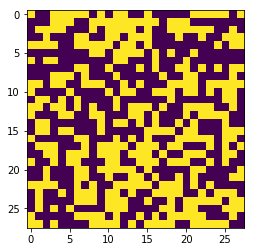

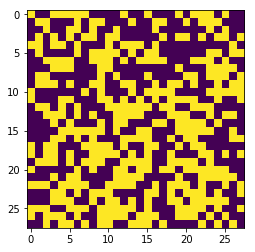

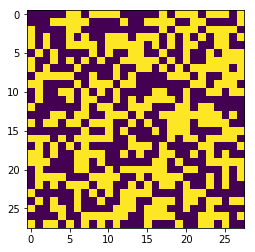

In [17]:
for f in range(len(foo)) :
    f = plt.imshow(foo[f])
    plt.show()

#### Its Working.

Now, to the experiment.

In [18]:
import math

## Computing the BDM Weights

In [19]:
from BDM import calculate_bdm,build_lookup_table

table = build_lookup_table('K-4x4.json')

In [20]:
def bdmLs(sts) :
    trSize = sts.shape[0]
    bdms = np.zeros(trSize)
    
    for i in range(trSize):
        bdms[i] = calculate_bdm(
          sts[i],
            table
        )
    
    return bdms

In [21]:
def compW(bdms, 
          perc = [75, 50],
          weights = [0.01, 0.5, 2]) :
    values =  {
        0:{
            'min' : np.amin(bdms[trainYs==0]), 
            'max' : np.amax(bdms[trainYs==0]), 
            'mean' : np.mean(bdms[trainYs==0])
            }, 
        1:{
            'min' : np.amin(bdms[trainYs==1]), 
            'max' : np.amax(bdms[trainYs==1]), 
            'mean' : np.mean(bdms[trainYs==1])
            },  
        2:{
            'min' : np.amin(bdms[trainYs==2]), 
            'max' : np.amax(bdms[trainYs==2]), 
            'mean' : np.mean(bdms[trainYs==2])
            }, 
        3:{
            'min' : np.amin(bdms[trainYs==3]), 
            'max' : np.amax(bdms[trainYs==3]), 
            'mean' : np.mean(bdms[trainYs==3])
            }, 
        4:{
            'min' : np.amin(bdms[trainYs==4]), 
            'max' : np.amax(bdms[trainYs==4]), 
            'mean' : np.mean(bdms[trainYs==4])
            },  
        5:{
            'min' : np.amin(bdms[trainYs==5]), 
            'max' : np.amax(bdms[trainYs==5]), 
            'mean' : np.mean(bdms[trainYs==5])
            }, 
        6:{
            'min' : np.amin(bdms[trainYs==6]), 
            'max' : np.amax(bdms[trainYs==6]), 
            'mean' : np.mean(bdms[trainYs==6])
            },  
        7:{
            'min' : np.amin(bdms[trainYs==7]), 
            'max' : np.amax(bdms[trainYs==7]), 
            'mean' : np.mean(bdms[trainYs==7])
            }, 
        8:{
            'min' : np.amin(bdms[trainYs==8]), 
            'max' : np.amax(bdms[trainYs==8]), 
            'mean' : np.mean(bdms[trainYs==8])
            }, 
        9:{
            'min' : np.amin(bdms[trainYs==9]), 
            'max' : np.amax(bdms[trainYs==9]), 
            'mean' : np.mean(bdms[trainYs==9])
            }, 
          }
    
    bdmsPar = np.zeros(len(bdms))
    j = 0
    #for i in bdmsPar :
        #if bdms[j] > np.percentile(bdms[trainYs==trainYs[j]], perc[0]) :
        #    bdmsPar[j] = weights[0]
        #elif bdms[j] >  np.percentile(bdms[trainYs==trainYs[j]], perc[1]) :
        #    bdmsPar[j] = weights[1]
        #else :
        #    bdmsPar[j] = weights[2]
        #j = j + 1
    for i in bdmsPar :
    # bdmsPar[j] = (np.abs(values[trainYs[j]]['mean']-bdms[j]))/(values[trainYs[j]]['mean'])
    #'''
        if bdms[j] > np.percentile(bdms[trainYs==trainYs[j]], 75) :
            bdmsPar[j] = 0.01   
        elif bdms[j] >  np.percentile(bdms[trainYs==trainYs[j]], 50) :
            bdmsPar[j] = 0.5
        else :
            bdmsPar[j] = 2
    #'''
        j = j + 1
    return bdmsPar

# Main Experiment

### The Keras framework.

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, Flatten,MaxPooling2D
from keras.utils import np_utils
from keras import optimizers

### Changing the data for proper training

In [23]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
Y_valid = np_utils.to_categorical(Y_valid, 10)

#### Training Variables

In [24]:
import math

img_rows, img_cols = 28, 28

batch_size = math.floor(len(X_train)/2)
num_classes = 10
epochs = 40

layers = 4

optimizer = 'adam'#'SGD'#'Adagrad'#'adam' #RMSprop

Let's see how this work.

In [25]:
def initModel ():

    reset_keras()

    modelTmp = Sequential()

    modelTmp.add(Flatten())
    
    
    for i in range(layers):

        modelTmp.add(Dense(128, activation='relu',
                kernel_initializer='random_uniform'))

    modelTmp.add(Dense(10, activation='softmax',
                 kernel_initializer='random_uniform'))

    modelTmp.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])
    
    
    
    return modelTmp

### Main Experiment function

In [26]:
def exp(pert, pxls, wts = False, perc = [75, 50]) :
    
    clear_session()
    
    trainTmp = saltSet(X_train, pert, pxls)

        
    tmpN = initModel()

    tmpN.fit(
            trainTmp, 
            Y_train,
            sample_weight = None,
            validation_data = (saltSet(X_valid, pert, pxls), Y_valid),
            batch_size=batch_size, epochs=epochs, verbose=0
        )

    r = tmpN.evaluate(x=X_test, y = Y_test, verbose=0)[1]
    
    del tmpN
    
    clear_session()
    
    bdmsV = bdmLs(trainTmp)
    wts = compW(bdmsV, perc = perc)
    
    tmpN2 =  initModel()
    
    tmpN2.fit(
            trainTmp, 
            Y_train,
            sample_weight = wts,
            validation_data = (saltSet(X_valid, pert, pxls), Y_valid),
            batch_size=batch_size, epochs=epochs, verbose=0
        )

    
    r2 = tmpN2.evaluate(x=X_test, y = Y_test, verbose=0)[1]
    
    clear_session()
    
    return r,r2
    

In [27]:
def simpleModelResult(
        epochs = 10,  pert =0.40, pxls=0.30,
        batchSize = 1):  
    
    # Training set
    trainTmp = saltSet(X_train, pert, pxls)
    #
    bdmsV = bdmLs(trainTmp)
    wts = compW(bdmsV)
    #
    
    ### To avoid memory leaks.
    reset_keras()

    model = initModel ()
    
    # Training the model.
    samples = X_train.shape[0]
    
    step = math.trunc(samples*batchSize)
    
    total = step*math.trunc(samples/step)
    
    rest = samples - total
    
    for i in range(epochs):
        indx = np.random.permutation(samples)
    
    
    # Training Not weigthed set.
    for i in range(epochs):
        #indx = np.random.permutation(samples)
        
        for j in range(0,total,step):
            batch = indx[j:(j+step)]
            
            _ = model.train_on_batch(trainTmp[batch], Y_train[batch], 
                                  sample_weight=None, 
                                  class_weight=None)
            
            #_ = modelW.train_on_batch(trainTmp[batch], Y_train[batch], 
            #                      sample_weight=wts[batch], 
            #                      class_weight=None)
            
        if((j+step)<samples):
            batch = indx[(j+step):samples]
            _ = model.train_on_batch(trainTmp[batch], Y_train[batch], 
                                  sample_weight=None, 
                                  class_weight=None)
            
            #_ = modelW.train_on_batch(trainTmp[batch], Y_train[batch], 
            #                      sample_weight=wts[batch], 
            #                      class_weight=None)


        
    res = np.array(model.evaluate(X_test, Y_test, verbose = 0))
    
    del model 
    
    reset_keras()
    
    modelW = initModel ()
    
    
    for i in range(epochs):

        
        for j in range(0,total,step):
            batch = indx[j:(j+step)]
            
            
            _ = modelW.train_on_batch(trainTmp[batch], Y_train[batch], 
                                  sample_weight=wts[batch], 
                                  class_weight=None)
            
        if((j+step)<samples):
            batch = indx[(j+step):samples]
            
            _ = modelW.train_on_batch(trainTmp[batch], Y_train[batch], 
                                  sample_weight=wts[batch], 
                                  class_weight=None)
            
    resW = np.array(modelW.evaluate(X_test, Y_test, verbose = 0))

    del modelW
    
    ### To avoid memory leaks.

    return res[1], resW[1]


In [28]:
reset_keras()

### Sanity Check

In [29]:
simpleModelResult(epochs = 3,  pert =0.40, pxls=0.30,
        batchSize = 0.5)

(0.5523, 0.3936)

In [30]:
simpleModelResult(epochs = 40,  pert =0.40, pxls=0.30,
        batchSize = 0.5)

(0.8287, 0.8677)

## Main Experiment

In [34]:
r, rw = simpleModelResult(epochs = 40,  pert =0.40, pxls=0.30,
        batchSize = 0.5)

In [35]:
print(r,rw)

0.8361 0.8716


In [36]:
results = np.zeros((11,6), dtype = float)

In [37]:
xs = [x / 10.0 for x in range(0, 11)]
ys = [x / 10.0 for x in range(0, 6)]

In [38]:
from numpy.random import seed

x = 0
y = 0
for i in xs :
    for j in ys :
    
        rs=[]
        for r in range(5) :
            seed(5132019+y+x+r)
            res, resW = simpleModelResult(
                epochs = 40,  pert =i, 
                pxls=j, batchSize = 0.5)
            
            rs.append(resW-res)
            
        results[x,y] = np.mean(rs)
        
        print(i, j, results[x,y])
        y+=1
    x+=1
    y = 0

0.0 0.0 -0.019600000000000017
0.0 0.1 -0.020740000000000026
0.0 0.2 -0.026660000000000017
0.0 0.3 -0.0254
0.0 0.4 -0.01971999999999998
0.0 0.5 -0.022499999999999985
0.1 0.0 -0.007600000000000007
0.1 0.1 0.004080000000000017
0.1 0.2 0.002179999999999982
0.1 0.3 0.0050200000000000244
0.1 0.4 0.007960000000000033
0.1 0.5 -0.007319999999999993
0.2 0.0 -0.01816000000000002
0.2 0.1 -0.00040000000000000034
0.2 0.2 0.005079999999999973
0.2 0.3 0.01539999999999997
0.2 0.4 0.0226
0.2 0.5 0.006899999999999973
0.3 0.0 -0.013759999999999972
0.3 0.1 0.009520000000000039
0.3 0.2 0.022920000000000006
0.3 0.3 0.03051999999999999
0.3 0.4 0.03172000000000001
0.3 0.5 -0.0008800000000000364
0.4 0.0 -0.017259999999999987
0.4 0.1 0.006000000000000005
0.4 0.2 0.019020000000000016
0.4 0.3 0.03294000000000004
0.4 0.4 0.04720000000000002
0.4 0.5 0.01878000000000002
0.5 0.0 -0.022219999999999972
0.5 0.1 0.0030399999999999984
0.5 0.2 0.010460000000000002
0.5 0.3 0.04512000000000003
0.5 0.4 0.07118000000000002
0.5 

In [39]:
np.savetxt('resultsFinal.txt', results)

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [94]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

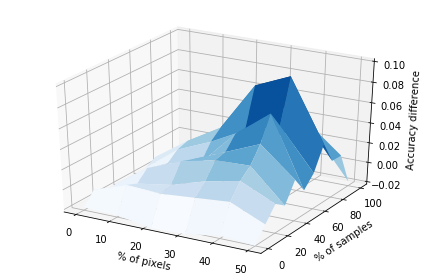

In [128]:
xs = [x *10.0 for x in range(0, 11)]
ys = [x *10.0 for x in range(0, 6)]
X, Y = np.meshgrid(ys, xs)
Z = results

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='Blues', linewidth=0, antialiased=True)

ax.set_zlim(-0.02, 0.1)

ax.set_xlabel('% of pixels')
ax.set_ylabel('% of samples')
ax.set_zlabel('Accuracy difference')

plt.tight_layout()

plt.savefig('plot.pdf', dpi=300)

plt.show()



In [127]:
plt.draw()
plt.savefig('accuracyPlot.pdf')

<Figure size 432x288 with 0 Axes>